In [1]:
import numpy as np
import pandas as pd

### Main dataset

In [4]:
df = pd.read_excel('data/v2 Census by county 2010.2016.xlsx')

In [5]:
df.head()

,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,...,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017
0,Alabama,Autauga County,54571,54571,54750,55199,54927,54695,54864,54838,...,-1.950739,4.831269,1.047102,5.911832,-6.102101,-4.050282,2.099325,-1.659040,5.103709,1.317904
1,Alabama,Baldwin County,182265,182265,183110,186534,190048,194736,199064,202863,...,17.047872,20.493601,22.383175,16.285940,17.196786,22.615285,20.380904,17.903749,21.317244,23.163873
2,Alabama,Barbour County,27457,27457,27332,27351,27175,26947,26749,26264,...,-16.222436,-18.755525,-19.042395,0.256021,-6.822433,-8.018920,-5.549762,-16.411069,-18.947692,-19.159940
3,Alabama,Bibb County,22915,22919,22872,22745,22658,22503,22533,22561,...,0.931388,-1.416117,-0.882983,-5.041980,-4.096646,-5.890038,1.243450,1.818424,-0.531044,0.000000
4,Alabama,Blount County,57322,57324,57381,57562,57595,57623,57546,57590,...,-1.563369,-1.736835,6.212416,0.243599,-1.354672,-0.486035,-1.771310,-0.538494,-0.659997,7.285313


In [6]:
df.columns

Index(['STNAME', 'CTYNAME', 'CENSUS2010POP', 'ESTIMATESBASE2010',
       'POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012',
       'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015',
       ...
       'RDOMESTICMIG2015', 'RDOMESTICMIG2016', 'RDOMESTICMIG2017',
       'RNETMIG2011', 'RNETMIG2012', 'RNETMIG2013', 'RNETMIG2014',
       'RNETMIG2015', 'RNETMIG2016', 'RNETMIG2017'],
      dtype='object', length=127)

### Find counties with flight

In [7]:
pop_growth = df[['STNAME', 'CTYNAME', 'RNATURALINC2011', 'RNATURALINC2012', 'RNATURALINC2013', 'RNATURALINC2014', 'RNATURALINC2015', 'RINTERNATIONALMIG2011', 'RINTERNATIONALMIG2012',
       'RINTERNATIONALMIG2013', 'RINTERNATIONALMIG2014', 'RINTERNATIONALMIG2015', 'RDOMESTICMIG2011', 'RDOMESTICMIG2012', 'RDOMESTICMIG2013',
       'RDOMESTICMIG2014', 'RDOMESTICMIG2015']].copy()

In [8]:
len(pop_growth)

3143

In [9]:
pop_growth.head()

,STNAME,CTYNAME,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015
0,Alabama,Autauga County,2.346542,0.980695,-0.164201,1.150065,1.221491,0.000000,-0.272415,0.036489,0.237315,0.291699,5.911832,-5.829686,-4.086771,1.862010,-1.950739
1,Alabama,Baldwin County,1.964052,1.131228,1.335814,1.152869,0.826021,0.936036,0.786017,0.800449,0.716100,0.855877,15.349904,16.410768,21.814836,19.664804,17.047872
2,Alabama,Barbour County,0.585191,0.293438,-0.406489,-1.825089,-2.150416,-0.146298,-0.403477,-0.369535,-0.335221,-0.188633,0.402319,-6.418956,-7.649385,-5.214541,-16.222436
3,Alabama,Bibb County,-0.482276,0.264300,-1.062864,0.266454,-0.443518,0.438433,0.616699,0.620004,0.754952,0.887036,-5.480413,-4.713345,-6.510042,0.488498,0.931388
4,Alabama,Blount County,3.044988,2.066744,1.058862,0.555705,1.407032,-0.226199,0.364719,0.624902,0.955118,1.024875,0.469798,-1.719392,-1.110938,-2.726428,-1.563369


In [10]:
pop_growth = pop_growth.transpose()

In [11]:
# goal: predict result in 2016 elections

# %age change in rate of natural increase
means_rni = pop_growth.iloc[2:7,].pct_change().replace([np.inf, -np.inf], np.nan).mean()
means_rni.name = 'Avg %Change in Natural Inc'
pop_growth = pop_growth.append(means_rni, ignore_index=False)

# %age change in int'l migration
means_imig = pop_growth.iloc[7:12,].pct_change().replace([np.inf, -np.inf], np.nan).mean()
means_imig.name = 'Avg %Change in Intl Migration'
pop_growth = pop_growth.append(means_imig, ignore_index=False)

# %age change in domestic migration
means_domig = pop_growth.iloc[12:-1,].pct_change().replace([np.inf, -np.inf], np.nan).mean()
means_domig.name = 'Avg %Change in Domestic Migration'
pop_growth = pop_growth.append(means_domig, ignore_index=False)

In [12]:
pop_growth = pop_growth.transpose()

In [13]:
# find counties with domestic flight
pop_growth['dom_flight'] = np.where(pop_growth['Avg %Change in Domestic Migration'] <= 0, 1, 0)

In [14]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 25)

In [15]:
# domestic flight w intl flight
pop_growth['dom & intl'] = np.where((pop_growth['dom_flight'] == 1) & (pop_growth['Avg %Change in Intl Migration'] <= 0), 1, 0)

# domestic flight w intl replacement
pop_growth['dom only'] = np.where((pop_growth['dom_flight'] == 1) & (pop_growth['Avg %Change in Intl Migration'] > 0), 1, 0)

In [16]:
pop_growth.head()

,STNAME,CTYNAME,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,Avg %Change in Natural Inc,Avg %Change in Intl Migration,Avg %Change in Domestic Migration,dom_flight,dom & intl,dom only
0,Alabama,Autauga County,2.34654,0.980695,-0.164201,1.15007,1.22149,0,-0.272415,0.036489,0.237315,0.291699,5.91183,-5.82969,-4.08677,1.86201,-1.95074,-2.42286,1.53299,-1.10927,1,0,1
1,Alabama,Baldwin County,1.96405,1.13123,1.33581,1.15287,0.826021,0.936036,0.786017,0.800449,0.7161,0.855877,15.3499,16.4108,21.8148,19.6648,17.0479,-0.165911,-0.0130237,-0.168591,1,1,0
2,Alabama,Barbour County,0.585191,0.293438,-0.406489,-1.82509,-2.15042,-0.146298,-0.403477,-0.369535,-0.335221,-0.188633,0.402319,-6.41896,-7.64938,-5.21454,-16.2224,0.196079,0.285912,-3.19652,1,0,1
3,Alabama,Bibb County,-0.482276,0.2643,-1.06286,0.266454,-0.443518,0.438433,0.616699,0.620004,0.754952,0.887036,-5.48041,-4.71334,-6.51004,0.488498,0.931388,-2.62117,0.201143,-0.748287,1,0,1
4,Alabama,Blount County,3.04499,2.06674,1.05886,0.555705,1.40703,-0.226199,0.364719,0.624902,0.955118,1.02487,0.469798,-1.71939,-1.11094,-2.72643,-1.56337,0.0619647,-0.324386,-1.00516,1,1,0


### Add Votes in 2016 elections

In [17]:
votes = pd.read_csv('data/2016_US_County_Level_Presidential_Results.csv')

In [18]:
votes.head()

,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
0,93003,130413,246588,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2013
1,93003,130413,246588,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2016
2,93003,130413,246588,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2020
3,93003,130413,246588,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2050
4,93003,130413,246588,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2060


In [19]:
state_lookup = pd.read_csv('data/state_lookup.csv')

In [20]:
votes = votes.merge(state_lookup)

In [21]:
votes.drop(columns=['state_abbr', 'votes_dem', 'votes_gop', 'total_votes', 'combined_fips'], inplace=True)

In [22]:
votes.head()

,per_dem,per_gop,diff,per_point_diff,county_name,state
0,0.377159,0.52887,"37,410",15.17%,Alaska,Alaska
1,0.377159,0.52887,"37,410",15.17%,Alaska,Alaska
2,0.377159,0.52887,"37,410",15.17%,Alaska,Alaska
3,0.377159,0.52887,"37,410",15.17%,Alaska,Alaska
4,0.377159,0.52887,"37,410",15.17%,Alaska,Alaska


In [23]:
len(pop_growth)

3143

In [24]:
len(votes)

3141

In [25]:
data = pop_growth.merge(votes, right_on=['state', 'county_name'], left_on=['STNAME', 'CTYNAME'], how='left')

In [26]:
len(data)

3143

In [27]:
# ignore
data[data['diff'].isna()]['STNAME'].value_counts()

Alaska          29
New Mexico       1
Hawaii           1
Louisiana        1
South Dakota     1
Name: STNAME, dtype: int64

In [28]:
data = data[~data['diff'].isna()].copy()

In [29]:
data.head()

,STNAME,CTYNAME,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,...,Avg %Change in Natural Inc,Avg %Change in Intl Migration,Avg %Change in Domestic Migration,dom_flight,dom & intl,dom only,per_dem,per_gop,diff,per_point_diff,county_name,state
0,Alabama,Autauga County,2.34654,0.980695,-0.164201,1.15007,1.22149,0,-0.272415,0.036489,0.237315,0.291699,...,-2.42286,1.53299,-1.10927,1,0,1,0.239569,0.734358,"12,202",49.48%,Autauga County,Alabama
1,Alabama,Baldwin County,1.96405,1.13123,1.33581,1.15287,0.826021,0.936036,0.786017,0.800449,0.7161,0.855877,...,-0.165911,-0.0130237,-0.168591,1,1,0,0.195653,0.773515,"54,371",57.79%,Baldwin County,Alabama
2,Alabama,Barbour County,0.585191,0.293438,-0.406489,-1.82509,-2.15042,-0.146298,-0.403477,-0.369535,-0.335221,-0.188633,...,0.196079,0.285912,-3.19652,1,0,1,0.466603,0.522714,583,5.61%,Barbour County,Alabama
3,Alabama,Bibb County,-0.482276,0.2643,-1.06286,0.266454,-0.443518,0.438433,0.616699,0.620004,0.754952,0.887036,...,-2.62117,0.201143,-0.748287,1,0,1,0.214220,0.769662,"4,859",55.54%,Bibb County,Alabama
4,Alabama,Blount County,3.04499,2.06674,1.05886,0.555705,1.40703,-0.226199,0.364719,0.624902,0.955118,1.02487,...,0.0619647,-0.324386,-1.00516,1,1,0,0.084699,0.898519,"20,658",81.38%,Blount County,Alabama


In [30]:
data['diff'] = data['diff'].str.replace(',', '').astype(int)

In [31]:
data['per_point_diff'] = data['per_point_diff'].str.replace('%', '').astype(float)

In [32]:
data['trump_vote'] = np.where(data['per_gop'] > data['per_dem'], 1, 0)

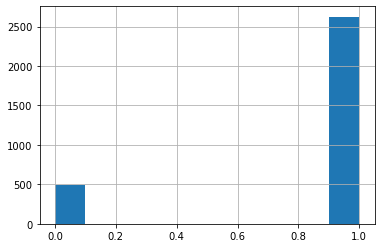

In [33]:
data['trump_vote'].hist()

In [34]:
data['per_gap'] = data['per_gop'] - data['per_dem']

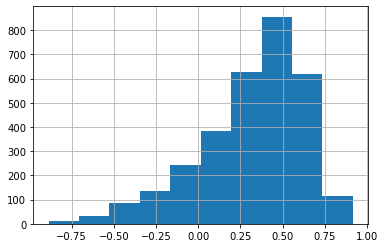

In [35]:
data['per_gap'].hist()

In [36]:
data['per_gap'].describe()

count    3110.000000
mean        0.319025
std         0.308816
min        -0.887245
25%         0.148912
50%         0.382174
75%         0.546839
max         0.916364
Name: per_gap, dtype: float64

## Data exploration

### Counties with flight

In [37]:
import matplotlib.pylab as plt
import seaborn as sns

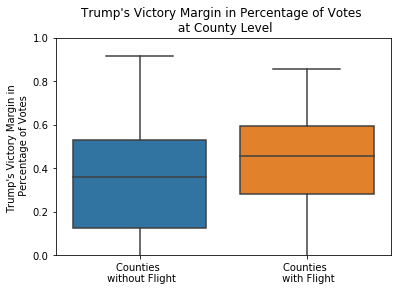

In [38]:
axes = plt.gca()
axes.set_ylim([0,1])
sns.boxplot(x='dom & intl', y='per_gap', data=data)
plt.ylabel('Trump\'s Victory Margin in \n Percentage of Votes')
plt.xticks([0,1], ['Counties \n without Flight', 'Counties \n with Flight'])
plt.xlabel('')
plt.title('Trump\'s Victory Margin in Percentage of Votes \n at County Level')
plt.show()

In [39]:
data.groupby('dom & intl')['trump_vote'].sum()

dom & intl
0    2021
1     603
Name: trump_vote, dtype: int64

In [40]:
data['dom & intl'].value_counts()

0    2447
1     663
Name: dom & intl, dtype: int64

In [41]:
1082/1315

0.8228136882129278

In [42]:
603/663

0.9095022624434389

In [43]:
data['migration_score'] = data['Avg %Change in Intl Migration'] + data['Avg %Change in Domestic Migration']

In [44]:
all_flight = data[data['dom & intl'] == 1].copy()

In [45]:
all_flight['trump_vote'].value_counts()

1    603
0     60
Name: trump_vote, dtype: int64

In [46]:
603/(603+60)

0.9095022624434389

In [47]:
len(all_flight)

663

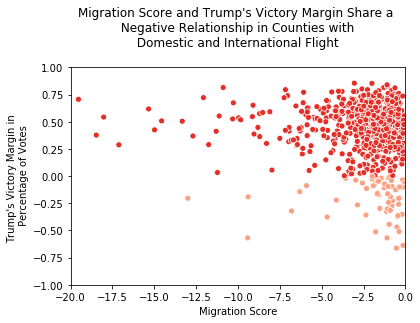

In [48]:
axes = plt.gca()
axes.set_xlim([-20, 0])
axes.set_ylim([-1, 1])
sns.scatterplot(x='migration_score', y='per_gap', hue='trump_vote', data=all_flight, 
                legend=False, palette='Reds')
plt.xlabel('Migration Score')
plt.ylabel('Trump\'s Victory Margin in \n Percentage of Votes')
plt.title('Migration Score and Trump\'s Victory Margin Share a \n Negative Relationship in Counties with \n Domestic and International Flight \n')
plt.show()

### Replacement by Foreigners

In [49]:
data['repl'] = np.where((data['Avg %Change in Domestic Migration'] < 0) & (data['Avg %Change in Intl Migration'] > 0),1,0)

In [50]:
foreign_repl = data[data['repl'] == 1].copy()

In [51]:
foreign_repl['trump_vote'].value_counts()

1    1012
0     228
Name: trump_vote, dtype: int64

In [52]:
1012/(1012+228)

0.8161290322580645

In [53]:
len(foreign_repl)

1240

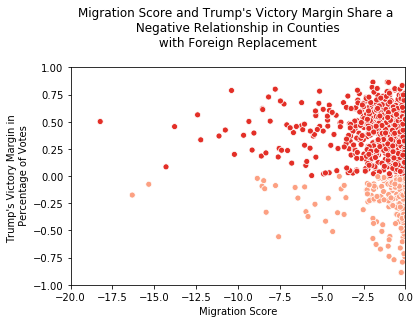

In [54]:
axes = plt.gca()
axes.set_xlim([-20, 0])
axes.set_ylim([-1, 1])
sns.scatterplot(x='migration_score', y='per_gap', hue='trump_vote', data=foreign_repl, 
                legend=False, palette='Reds')
plt.xlabel('Migration Score')
plt.ylabel('Trump\'s Victory Margin in \n Percentage of Votes')
plt.title('Migration Score and Trump\'s Victory Margin Share a \n Negative Relationship in Counties \n with Foreign Replacement \n')
plt.show()

In [55]:
pd.set_option('display.max_columns', 100)

In [56]:
data.iloc[:5,19:]

,Avg %Change in Domestic Migration,dom_flight,dom & intl,dom only,per_dem,per_gop,diff,per_point_diff,county_name,state,trump_vote,per_gap,migration_score,repl
0,-1.10927,1,0,1,0.239569,0.734358,12202,49.48,Autauga County,Alabama,1,0.494789,0.42372,1
1,-0.168591,1,1,0,0.195653,0.773515,54371,57.79,Baldwin County,Alabama,1,0.577862,-0.181615,0
2,-3.19652,1,0,1,0.466603,0.522714,583,5.61,Barbour County,Alabama,1,0.056112,-2.91061,1
3,-0.748287,1,0,1,0.214220,0.769662,4859,55.54,Bibb County,Alabama,1,0.555441,-0.547145,1
4,-1.00516,1,1,0,0.084699,0.898519,20658,81.38,Blount County,Alabama,1,0.813820,-1.32954,0


## Modeling

In [57]:
len(data)

3110

In [58]:
data['Avg %Change in Intl Migration'] = np.where(data['Avg %Change in Intl Migration'].isnull(),0,data['Avg %Change in Intl Migration'])

In [59]:
data['Avg %Change in Intl Migration'] = data['Avg %Change in Intl Migration'].astype(float)
data['Avg %Change in Domestic Migration'] = data['Avg %Change in Domestic Migration'].astype(float)
data['Avg %Change in Natural Inc'] = data['Avg %Change in Natural Inc'].astype(float)

In [60]:
dom_flight = data[data['dom_flight'] == 1].copy()

In [61]:
dom_flight['STNAME'].value_counts()[:10]

Texas             153
Georgia           108
Virginia           94
Missouri           72
Kansas             70
Kentucky           69
Indiana            68
Nebraska           68
Tennessee          67
North Carolina     57
Name: STNAME, dtype: int64

In [62]:
dom_flight.corr()

,Avg %Change in Natural Inc,Avg %Change in Intl Migration,Avg %Change in Domestic Migration,dom_flight,dom & intl,dom only,per_dem,per_gop,diff,per_point_diff,trump_vote,per_gap,repl
Avg %Change in Natural Inc,1.000000,-0.004327,0.045257,NaN,-0.017890,0.020021,0.049244,-0.052668,0.005986,-0.040607,-0.046492,-0.051197,0.020021
Avg %Change in Intl Migration,-0.004327,1.000000,0.016047,NaN,-0.556679,0.545226,0.061754,-0.062066,0.010105,-0.074775,-0.033159,-0.062183,0.545226
Avg %Change in Domestic Migration,0.045257,0.016047,1.000000,NaN,-0.049483,0.040313,0.011468,-0.017952,0.026625,-0.011059,-0.007767,-0.014809,0.040313
dom_flight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dom & intl,-0.017890,-0.556679,-0.049483,NaN,1.000000,-0.920400,-0.165185,0.175156,-0.099716,0.150178,0.115199,0.170970,-0.920400
dom only,0.020021,0.545226,0.040313,NaN,-0.920400,1.000000,0.219369,-0.231064,0.115100,-0.218592,-0.130421,-0.226266,1.000000
per_dem,0.049244,0.061754,0.011468,NaN,-0.165185,0.219369,1.000000,-0.982556,0.285671,-0.688309,-0.766876,-0.995537,0.219369
per_gop,-0.052668,-0.062066,-0.017952,NaN,0.175156,-0.231064,-0.982556,1.000000,-0.279222,0.710852,0.755770,0.995721,-0.231064
diff,0.005986,0.010105,0.026625,NaN,-0.099716,0.115100,0.285671,-0.279222,1.000000,0.016333,-0.257426,-0.283652,0.115100
per_point_diff,-0.040607,-0.074775,-0.011059,NaN,0.150178,-0.218592,-0.688309,0.710852,0.016333,1.000000,0.336070,0.702770,-0.218592


In [63]:
X = dom_flight[['Avg %Change in Natural Inc', 'Avg %Change in Intl Migration', 'Avg %Change in Domestic Migration', 'dom & intl', 'migration_score']].copy()



In [64]:
X.rename(columns={
        'Avg %Change in Natural Inc': 'rni',
        'Avg %Change in Intl Migration': 'foreign_migration',
        'Avg %Change in Domestic Migration': 'domestic_migration',
        'dom & intl': 'flight'
    }, inplace=True)

In [65]:
X.head()

,rni,foreign_migration,domestic_migration,flight,migration_score
0,-2.422855,1.532985,-1.109266,0,0.42372
1,-0.165911,-0.013024,-0.168591,1,-0.181615
2,0.196079,0.285912,-3.196521,0,-2.91061
3,-2.621169,0.201143,-0.748287,0,-0.547145
4,0.061965,-0.324386,-1.005157,1,-1.32954


In [66]:
X = X[['rni', 'foreign_migration', 'domestic_migration']].values

In [67]:
X

array([[-2.42285513,  1.53298541, -1.10926589],
       [-0.16591071, -0.01302366, -0.16859101],
       [ 0.19607851,  0.28591212, -3.19652103],
       ...,
       [-1.76268169,  0.80979836, -5.93486452],
       [-0.00847951,  0.06345621, -0.30976379],
       [-0.00847951,  0.06345621, -0.30976379]])

In [68]:
y = dom_flight['trump_vote'].values
# y = data['per_gap_multi'].values

In [69]:
y

array([1, 1, 1, ..., 1, 0, 0])

In [70]:
len(X), len(y)

(1978, 1978)

### Baseline: Logistic Regression

In [71]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=786)

In [73]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)

In [74]:
logreg.coef_

array([[-0.07907921, -0.17092285, -0.00136818]])

In [75]:
logreg_y_pred = logreg.predict(X_test)

In [76]:
accuracy_score(y_test, logreg_y_pred)

0.8518518518518519

In [77]:
roc_auc_score(y_test, logreg_y_pred)

0.5

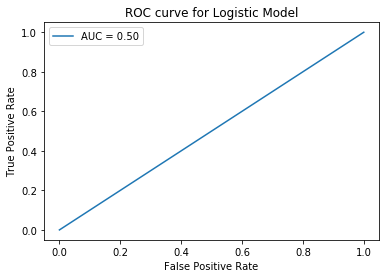

In [78]:
fpr, tpr, _ = roc_curve(y_test, logreg_y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Model')
plt.legend(['AUC = 0.50'])
plt.show()

### KNN classification

In [79]:
neighbors = KNN(n_neighbors=15)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [81]:
neighbors.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [82]:
knn_y_preds = neighbors.predict(X_test)

In [83]:
accuracy_score(y_test, knn_y_preds)

0.8636363636363636

In [84]:
roc_auc_score(y_test, knn_y_preds)

0.5467836257309941

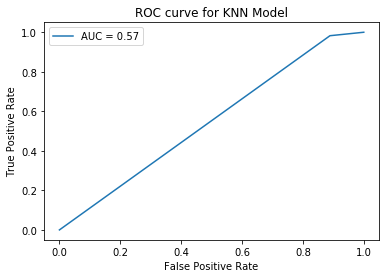

In [85]:
fpr, tpr, _ = roc_curve(y_test, knn_y_preds)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for KNN Model')
plt.legend(['AUC = 0.57'])
plt.show()

In [92]:
from sklearn.metrics import precision_score, recall_score

In [94]:
# when it says it's a 1, is it a 1?
precision_score(y_test, knn_y_preds)

0.84375

In [95]:
# how many of the 1's does it capture
recall_score(y_test, knn_y_preds)

0.9662027833001988

In [86]:
scores = []

for n in range(1,201):
    neighbors = KNN(n_neighbors=n)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=5001)
    neighbors.fit(X_train, y_train)
    score = neighbors.score(X_test, y_test)
    
    scores.append([n, score])

In [87]:
scores = list(scores)

In [88]:
scores = pd.Series([l[1] for l in scores])

In [89]:
scores.index = scores.index + 1

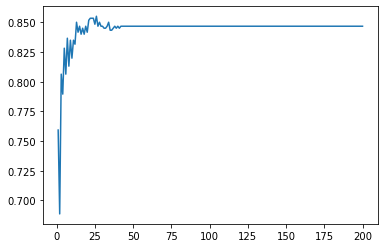

In [90]:
axes = plt.gca()
# axes.set_ylim([.6, .9])
# axes.set_xlim([0, 50])
scores.plot()

In [91]:
scores[40:60]

41    0.845118
42    0.846801
43    0.846801
44    0.846801
45    0.846801
46    0.846801
47    0.846801
48    0.846801
49    0.846801
50    0.846801
51    0.846801
52    0.846801
53    0.846801
54    0.846801
55    0.846801
56    0.846801
57    0.846801
58    0.846801
59    0.846801
60    0.846801
dtype: float64